In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import io
import requests
from matplotlib.colors import LogNorm

In [2]:
url_total  = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_recovs = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'

In [3]:
def covid_country(country = 'Total', url = url_total):
    s=requests.get(url).content
    df = pd.read_csv(io.StringIO(s.decode('utf-8')))
    df.rename(columns={"Country/Region" : "Country", "Province/State" : "Province"}, inplace=True)
    if country == 'Total':
        return df
    else:
        df_country = df[df['Country'].str.match(country)]
        return df_country

In [4]:
def get_cases(df_country, period = '1/22/20'):
    return df_country.loc[:, '1/22/20':].values[0]

In [5]:
# Italy
df_It      = covid_country('Italy', url_total)
df_It_dead = covid_country('Italy', url_deaths)
df_It_reco = covid_country('Italy', url_recovs)

# Germany
df_De      = covid_country('Germany', url_total)
df_De_dead = covid_country('Germany', url_deaths)
df_De_reco = covid_country('Germany', url_recovs)

# France
df_Fr      = covid_country('France', url_total)
df_Fr_dead = covid_country('France', url_deaths)
df_Fr_reco = covid_country('France', url_recovs)

In [6]:
df_Ch = covid_country('Mainland China', url_total)
df_Ch = df_Ch.sum(numeric_only=True)
cases_china = df_Ch[2:].values

df_Ch_dead = covid_country('Mainland China', url_deaths)
df_Ch_dead = df_Ch_dead.sum(numeric_only=True)
deaths_china = df_Ch_dead[2:].values

df_Ch_reco = covid_country('Mainland China', url_deaths)
df_Ch_reco = df_Ch_reco.sum(numeric_only=True)
recovs_china = df_Ch_reco[2:].values

In [11]:
cases_It = get_cases(df_It)
cases_It_dead = get_cases(df_It_dead)
cases_It_reco = get_cases(df_It_reco)

cases_Fr = get_cases(df_Fr)
cases_Fr_dead = get_cases(df_Fr_dead)
cases_Fr_reco = get_cases(df_Fr_reco)

cases_De = get_cases(df_De)
cases_De_dead = get_cases(df_De_dead)
cases_De_reco = get_cases(df_De_reco)

In [8]:
#default values:

offset_It = 0 #try 9 or 10
offset_Fr = 0
offset_De = 0
offset_Ch = 0

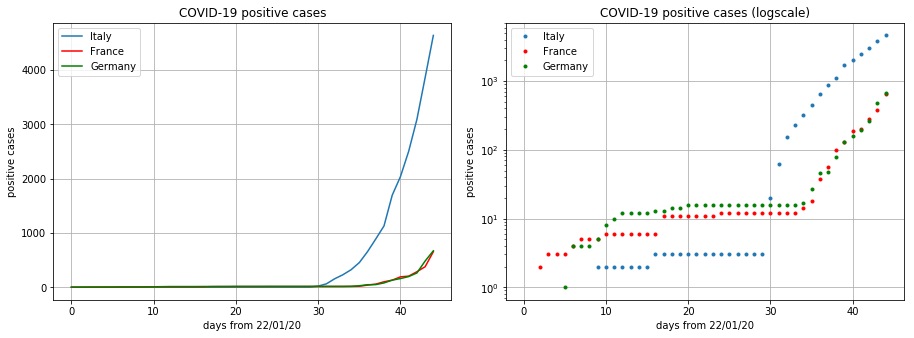

In [12]:
time = range(len(cases_It))

plt.figure(figsize=[12.8, 4.8])
plt.subplot(1,2,1)

plt.plot(np.add(time,offset_It), cases_It, label="Italy")
plt.plot(np.add(time,offset_Fr), cases_Fr, color="red", label="France")
plt.plot(np.add(time,offset_De), cases_De, color="green", label="Germany")
#plt.plot(np.add(time,offset_china), cases_china, color="orange", label="China")
plt.title("COVID-19 positive cases")
plt.xlabel("days from 22/01/20")
plt.ylabel("positive cases")
plt.legend(loc="best")
plt.grid()

plt.subplot(1,2,2)
plt.plot(np.add(time,offset_It), cases_It, label="Italy", marker='.', linestyle='None')
plt.plot(np.add(time,offset_Fr), cases_Fr, color="red", label="France", marker='.', linestyle='None')
plt.plot(np.add(time,offset_De), cases_De, color="green", label="Germany", marker='.', linestyle='None')
#plt.plot(np.add(time,offset_china), cases_china, color="orange", label="China", marker='.', linestyle='None')
plt.yscale("log")
plt.title("COVID-19 positive cases (logscale)")
plt.xlabel("days from 22/01/20")
plt.ylabel("positive cases")
plt.legend(loc="best")
plt.grid()

plt.tight_layout()
plt.show()